# Task - 2
Quantium client has asked us to evaluate the performance of a store trial which was performed in stores 77, 86 and 88.
This can be broken down by:
*   total sales revenue
*   total number of customers
*   average number of transactions per customer






In [ ]:
#import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#import data file
from google.colab import files
data=files.upload()

Saving QVI_data.csv to QVI_data.csv


In [ ]:
chips=pd.read_csv('QVI_data.csv')
#ds = dataset

In [ ]:
chips

In [ ]:
#creating month and year column
chips['DATE']=pd.to_datetime(chips['DATE'])
chips['MONTH_YEAR']=chips['DATE'].dt.strftime('%m/%Y')
chips['MONTH_YEAR']

0         10/2018
1         09/2018
2         03/2019
3         03/2019
4         11/2018
           ...   
264829    12/2018
264830    10/2018
264831    10/2018
264832    10/2018
264833    12/2018
Name: MONTH_YEAR, Length: 264834, dtype: object

In [ ]:
#to find comparison stores
chips['MONTH_YEAR']=pd.to_datetime(chips['MONTH_YEAR'])
chips_before=chips[(chips['MONTH_YEAR']>='07/2018')&(chips['MONTH_YEAR']<='01/2019')]
chips_before['MONTH_YEAR'].value_counts()

2018-12-01    22835
2018-07-01    22562
2018-08-01    22410
2018-10-01    22288
2019-01-01    22161
2018-11-01    21852
2018-09-01    21743
Name: MONTH_YEAR, dtype: int64

In [ ]:
#grouping by store number and month year
chips_grp_before=chips_before.groupby(['STORE_NBR','MONTH_YEAR'])
total_grp=chips_grp_before['TOT_SALES'].sum()
total_grp

STORE_NBR  MONTH_YEAR
1          2018-07-01    206.9
           2018-08-01    176.1
           2018-09-01    278.8
           2018-10-01    188.1
           2018-11-01    192.6
                         ...  
272        2018-09-01    304.7
           2018-10-01    430.6
           2018-11-01    376.2
           2018-12-01    403.9
           2019-01-01    423.0
Name: TOT_SALES, Length: 1848, dtype: float64

In [ ]:
#total sales by store number
chips_grp_sales=chips_before.groupby(['STORE_NBR'])
total_sales=chips_grp_sales['TOT_SALES'].sum()
total_sales

STORE_NBR
1      1386.90
2      1128.50
3      7526.15
4      9127.00
5      5739.70
        ...   
268    1549.05
269    6664.50
270    6697.95
271    5765.10
272    2744.35
Name: TOT_SALES, Length: 271, dtype: float64

In [ ]:
#total sales in trial stores
trial_store=total_sales[76:88]
trial_store

STORE_NBR
77    1699.00
78    5466.40
79    7143.15
80    6953.40
81    8260.30
82    2289.90
83    5739.80
84    3238.50
85      13.90
86    6119.85
87    2385.50
88    9383.60
Name: TOT_SALES, dtype: float64

# Total sales for trail stores between july 2018 to january 2019:


*   store 77:1699.00
*   store 86:6119.85
*   store 88:9383.60




In [ ]:
#sorting stores by total sales
#searching for matching store of store 77
total_sorted=total_sales.sort_values(ascending=True)
total_sorted.iloc[63:73]

STORE_NBR
53     1611.1
6      1618.8
255    1636.6
233    1659.8
188    1683.5
77     1699.0
187    1702.2
90     1736.4
46     1758.0
220    1788.6
Name: TOT_SALES, dtype: float64

In [ ]:
stores_control_one=[6,46,53,77,90,187,188,220,233,255]
control_one=pd.DataFrame({'Value':total_grp[stores_control_one]})
print(control_one)

                      Value
STORE_NBR MONTH_YEAR       
6         2018-07-01  260.0
          2018-08-01  203.2
          2018-09-01  207.7
          2018-10-01  292.4
          2018-11-01  255.3
...                     ...
255       2018-09-01  227.7
          2018-10-01  235.6
          2018-11-01  253.2
          2018-12-01  262.4
          2019-01-01  231.7

[70 rows x 1 columns]


In [ ]:
pivot_chips1=control_one.pivot_table(index='MONTH_YEAR',columns='STORE_NBR',values='Value')
pivot_chips1

STORE_NBR,6,46,53,77,90,187,188,220,233,255
MONTH_YEAR,,,,,,,,,,
2018-07-01,260.0,253.0,229.8,296.8,235.4,253.9,234.4,244.1,290.7,254.1
2018-08-01,203.2,240.7,255.1,255.5,224.5,214.3,210.3,275.0,285.9,171.9
2018-09-01,207.7,233.0,188.0,225.2,162.4,276.1,280.8,219.3,228.6,227.7
2018-10-01,292.4,275.1,238.9,204.5,319.4,181.4,246.3,293.4,185.7,235.6
2018-11-01,255.3,273.1,223.8,245.3,226.2,327.9,236.8,290.7,211.6,253.2
2018-12-01,209.1,306.9,302.6,267.3,262.7,264.4,266.8,227.4,279.8,262.4
2019-01-01,191.1,176.2,172.9,204.4,305.8,184.2,208.1,238.7,177.5,231.7


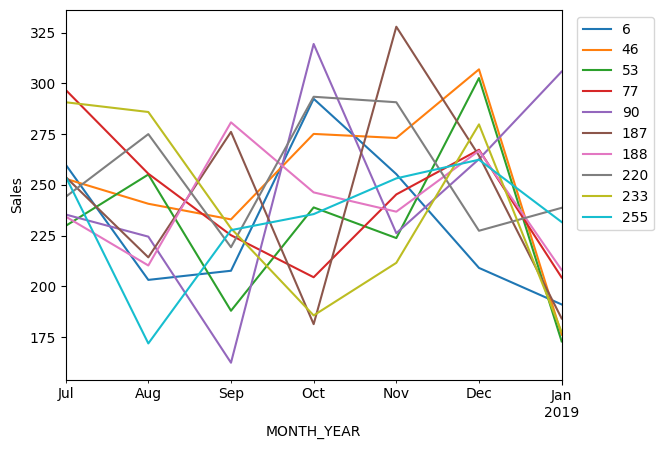

In [ ]:
pivot_chips1.plot()
plt.legend(loc='upper right',bbox_to_anchor=(1.20,1))
plt.ylabel('Sales')
plt.show()

In [ ]:
#correlation
pivot_chips1.corr(method='pearson')

STORE_NBR,6,46,53,77,90,187,188,220,233,255
STORE_NBR,,,,,,,,,,
6,1.000000,0.484580,0.139538,0.042490,0.288923,0.041493,0.115455,0.641903,-0.176677,0.363013
46,0.484580,1.000000,0.838008,0.435650,-0.038130,0.433520,0.527886,0.239256,0.401329,0.402832
53,0.139538,0.838008,1.000000,0.532764,0.112228,0.125959,0.199495,0.133959,0.625439,0.101587
77,0.042490,0.435650,0.532764,1.000000,-0.377649,0.460669,0.042708,-0.183091,0.903774,0.191091
90,0.288923,-0.038130,0.112228,-0.377649,1.000000,-0.681605,-0.422287,0.341478,-0.453268,0.177864
187,0.041493,0.433520,0.125959,0.460669,-0.681605,1.000000,0.457048,-0.086637,0.280566,0.421864
188,0.115455,0.527886,0.199495,0.042708,-0.422287,0.457048,1.000000,-0.422733,0.090490,0.461834
220,0.641903,0.239256,0.133959,-0.183091,0.341478,-0.086637,-0.422733,1.000000,-0.271433,-0.223507
233,-0.176677,0.401329,0.625439,0.903774,-0.453268,0.280566,0.090490,-0.271433,1.000000,-0.128047


<function matplotlib.pyplot.show(close=None, block=None)>

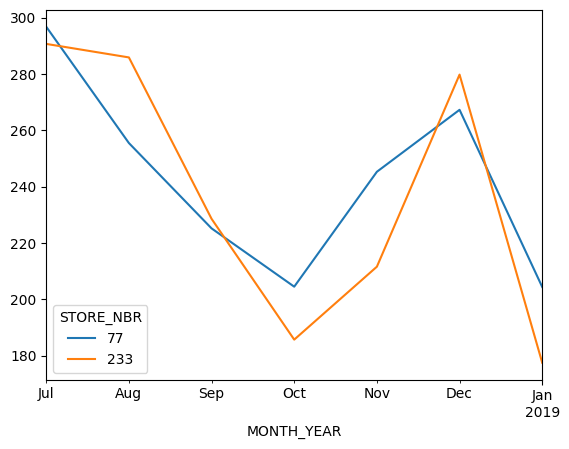

In [ ]:
#here we can observe store 233 has the strongest correlation at .90
#it's graphical view is as follows
chips1_graph=pivot_chips1[[77,233]]
chips1_graph.plot()
plt.show

The stores 77 and 233 have .90 correlation and having 40 dollars difference.
*   Store 77: Total sales=1699.00; Control Store: 233; Total sales(233)=1659.80  
*   Store 86: Total sales=6119.85; Control Store: ?
*   Store 88: Total sales=9383.60; Control Store: ?







In [ ]:
#searching for matching store of store 86
total_sorted.iloc[176:186]

STORE_NBR
23     6098.90
48     6112.30
172    6113.40
13     6114.70
86     6119.85
196    6126.30
57     6147.40
30     6194.60
236    6197.40
105    6206.20
Name: TOT_SALES, dtype: float64

In [ ]:
stores_control_two=[13,23,30,48,57,86,105,172,196,236]
control_two=pd.DataFrame({'Value':total_grp[stores_control_two]})
print(control_two)

                       Value
STORE_NBR MONTH_YEAR        
13        2018-07-01   811.8
          2018-08-01   756.9
          2018-09-01   840.0
          2018-10-01   851.0
          2018-11-01  1049.4
...                      ...
236       2018-09-01   864.6
          2018-10-01   879.6
          2018-11-01   705.2
          2018-12-01   987.0
          2019-01-01   838.2

[70 rows x 1 columns]


In [ ]:
pivot_chips2=control_two.pivot_table(index='MONTH_YEAR',columns='STORE_NBR',values='Value')
pivot_chips2

STORE_NBR,13,23,30,48,57,86,105,172,196,236
MONTH_YEAR,,,,,,,,,,
2018-07-01,811.8,890.8,879.8,929.4,839.6,892.20,928.9,820.8,876.2,952.0
2018-08-01,756.9,952.1,935.8,851.1,915.4,764.05,923.7,758.0,848.7,970.8
2018-09-01,840.0,720.8,860.6,809.8,792.8,914.60,846.6,816.4,858.4,864.6
2018-10-01,851.0,793.4,862.6,879.2,965.8,948.40,880.0,1040.8,846.0,879.6
2018-11-01,1049.4,826.0,819.0,785.4,830.0,918.00,771.4,851.4,770.2,705.2
2018-12-01,878.6,985.0,1014.0,917.2,951.0,841.20,1048.6,928.8,1007.4,987.0
2019-01-01,927.0,930.8,822.8,940.2,852.8,841.40,807.0,897.2,919.4,838.2


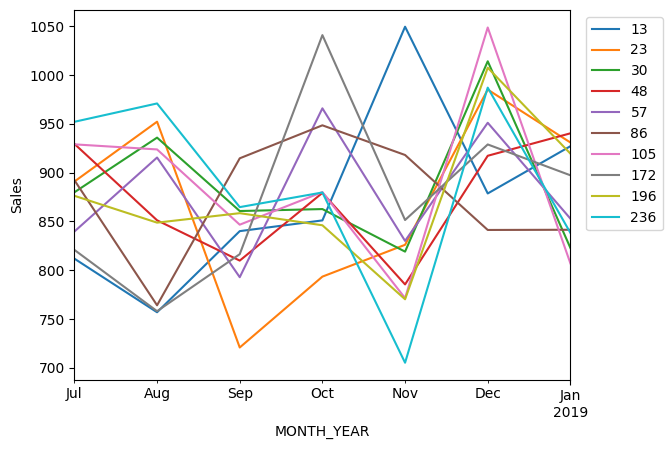

In [ ]:
pivot_chips2.plot()
plt.legend(loc='upper right',bbox_to_anchor=(1.20,1))
plt.ylabel('Sales')
plt.show()

In [ ]:
pivot_chips2.corr(method='pearson')

STORE_NBR,13,23,30,48,57,86,105,172,196,236
STORE_NBR,,,,,,,,,,
13,1.000000,-0.150189,-0.477595,-0.310142,-0.283500,0.409610,-0.563172,0.240211,-0.270657,-0.853592
23,-0.150189,1.000000,0.594336,0.620930,0.458281,-0.784698,0.558633,-0.115548,0.600215,0.515399
30,-0.477595,0.594336,1.000000,0.292305,0.599159,-0.516913,0.952586,-0.021631,0.689615,0.805425
48,-0.310142,0.620930,0.292305,1.000000,0.363605,-0.271147,0.479948,0.303527,0.735414,0.573430
57,-0.283500,0.458281,0.599159,0.363605,1.000000,-0.218110,0.603628,0.593520,0.393114,0.495600
86,0.409610,-0.784698,-0.516913,-0.271147,-0.218110,1.000000,-0.381464,0.524475,-0.373196,-0.520981
105,-0.563172,0.558633,0.952586,0.479948,0.603628,-0.381464,1.000000,0.083882,0.739672,0.888408
172,0.240211,-0.115548,-0.021631,0.303527,0.593520,0.524475,0.083882,1.000000,0.239403,-0.086124
196,-0.270657,0.600215,0.689615,0.735414,0.393114,-0.373196,0.739672,0.239403,1.000000,0.665074


In [ ]:
#correlation is .52 with 172 store
total_sorted.iloc[180:195]

STORE_NBR
86     6119.85
196    6126.30
57     6147.40
30     6194.60
236    6197.40
105    6206.20
91     6230.00
109    6238.30
97     6264.95
180    6265.70
102    6286.00
164    6289.40
155    6308.70
184    6309.00
160    6311.60
Name: TOT_SALES, dtype: float64

In [ ]:
stores_control_three=[86,91,97,102,109,155,160,164,180,184]
control_three=pd.DataFrame({'Value':total_grp[stores_control_three]})
print(control_three)

                       Value
STORE_NBR MONTH_YEAR        
86        2018-07-01  892.20
          2018-08-01  764.05
          2018-09-01  914.60
          2018-10-01  948.40
          2018-11-01  918.00
...                      ...
184       2018-09-01  873.00
          2018-10-01  895.20
          2018-11-01  869.20
          2018-12-01  900.00
          2019-01-01  913.40

[70 rows x 1 columns]


In [ ]:
pivot_chips3=control_three.pivot_table(index='MONTH_YEAR',columns='STORE_NBR',values='Value')
pivot_chips3

STORE_NBR,86,91,97,102,109,155,160,164,180,184
MONTH_YEAR,,,,,,,,,,
2018-07-01,892.20,827.7,848.20,782.4,884.0,924.6,894.8,853.2,816.6,983.8
2018-08-01,764.05,916.1,917.35,986.4,828.3,782.7,756.2,920.2,788.5,874.4
2018-09-01,914.60,1000.1,908.80,970.4,871.4,1014.4,915.2,841.4,911.4,873.0
2018-10-01,948.40,851.8,993.20,902.2,957.6,963.8,887.4,863.2,871.4,895.2
2018-11-01,918.00,911.2,853.40,930.0,929.6,898.8,936.0,829.6,793.4,869.2
2018-12-01,841.20,866.8,899.40,816.6,908.8,849.8,1018.4,1031.6,995.0,900.0
2019-01-01,841.40,856.3,844.60,898.0,858.6,874.6,903.6,950.2,1089.4,913.4


In [ ]:
pivot_chips3.corr(method='pearson')

STORE_NBR,86,91,97,102,109,155,160,164,180,184
STORE_NBR,,,,,,,,,,
86,1.000000,0.019027,0.211778,-0.158172,0.788300,0.877882,0.441970,-0.624613,-0.115073,0.072641
91,0.019027,1.000000,0.107347,0.756611,-0.286609,0.285142,-0.124414,-0.307085,-0.157871,-0.703307
97,0.211778,0.107347,1.000000,0.296909,0.378689,0.214531,-0.208412,-0.034539,-0.165523,-0.373501
102,-0.158172,0.756611,0.296909,1.000000,-0.305346,-0.017878,-0.554953,-0.307030,-0.208742,-0.826582
109,0.788300,-0.286609,0.378689,-0.305346,1.000000,0.451168,0.548266,-0.219011,-0.104106,-0.037604
155,0.877882,0.285142,0.214531,-0.017878,0.451168,1.000000,0.325977,-0.609502,0.021320,0.074457
160,0.441970,-0.124414,-0.208412,-0.554953,0.548266,0.325977,1.000000,0.296822,0.476804,0.097636
164,-0.624613,-0.307085,-0.034539,-0.307030,-0.219011,-0.609502,0.296822,1.000000,0.635272,0.009959
180,-0.115073,-0.157871,-0.165523,-0.208742,-0.104106,0.021320,0.476804,0.635272,1.000000,0.057764


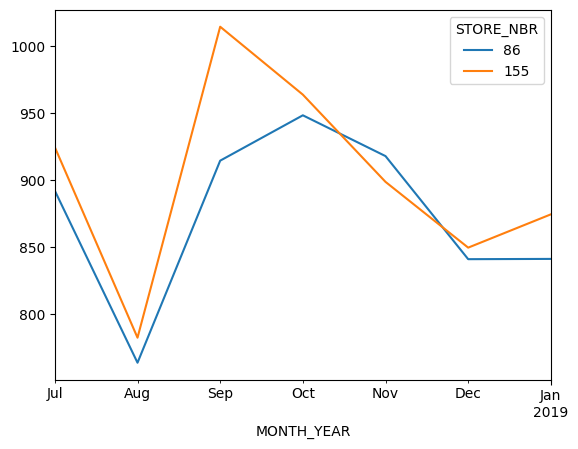

In [ ]:
store_86_155=pivot_chips3[[86,155]]
store_86_155.plot()
plt.show()

The store number have correlation .87

In [ ]:
#correlation of entire table
total_grp_df=pd.DataFrame(total_grp)
total_grp_pivot=total_grp_df.pivot_table(index='MONTH_YEAR',columns='STORE_NBR',values='TOT_SALES')
total_grp_pivot_table=total_grp_pivot.corr(method='pearson')
total_grp_pivot_table[86].sort_values(ascending=False).head(10)

STORE_NBR
31     1.000000
86     1.000000
155    0.877882
132    0.846517
240    0.825066
222    0.795075
109    0.788300
138    0.759864
198    0.748794
114    0.734415
Name: 86, dtype: float64

In [ ]:
total_sorted.iloc[[31,240,132,155]]

STORE_NBR
14      283.2
65     7602.4
242    3423.2
5      5739.7
Name: TOT_SALES, dtype: float64

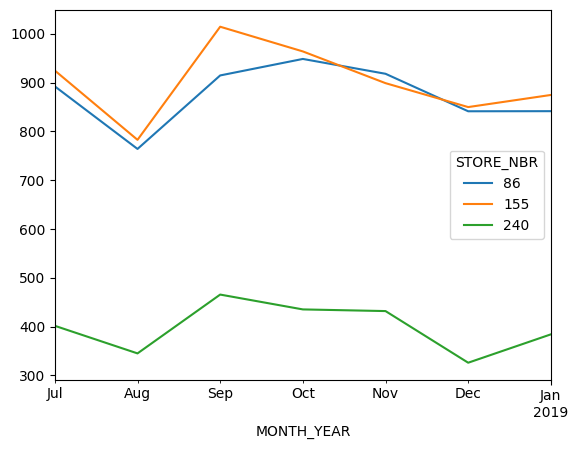

In [ ]:
#since store 132 sales are too low to use. So use 240,155,86 from total group
three=total_grp[[86,155,240]]
three_df=pd.DataFrame(three)
three_pivot=three_df.pivot_table(index='MONTH_YEAR',columns='STORE_NBR',values='TOT_SALES')
three_pivot.plot()
plt.show()

Even though store 240 has good correlation, I choose 155 store as a much better fit.
* Store 77: Total sales=1699.00; Control Store: 233; Total sales(233)=1659.80
* Store 86: Total sales=6119.85; Control Store: 155; Total sales(155)=6308.70
* Store 88: Total sales=9383.60; Control Store: ?

In [ ]:
#now the last trial store 88
total_grp_pivot_table[88].sort_values(ascending=False).head(10)

STORE_NBR
88     1.000000
159    0.903186
204    0.885774
134    0.864293
1      0.813636
253    0.811838
91     0.776688
61     0.748929
178    0.731857
188    0.716752
Name: 88, dtype: float64

In [ ]:
total_sorted.iloc[260:]

STORE_NBR
26      8463.40
72      8518.50
199     8654.40
40      8866.80
203     8943.70
4       9127.00
58      9178.75
165     9237.80
237     9369.00
88      9383.60
226    10239.15
Name: TOT_SALES, dtype: float64

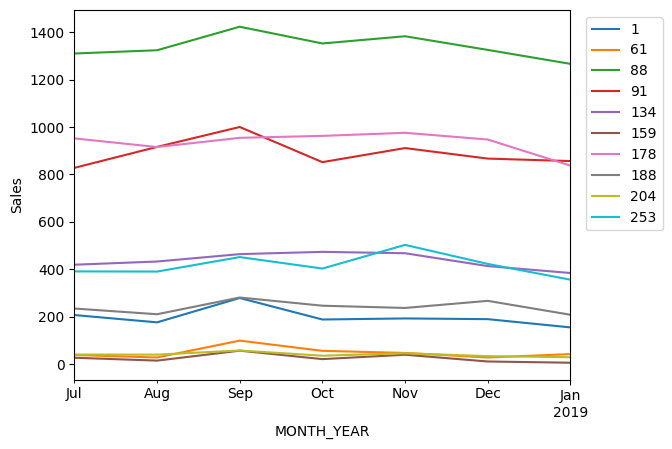

In [ ]:
#here none of the stores colse to sales amount but these are matching with the pattern
chips_four=total_grp[[1,61,88,91,134,159,178,188,204,253]]
chips_four_df=pd.DataFrame(chips_four)
chips_four_pivot=chips_four_df.pivot_table(index='MONTH_YEAR',columns='STORE_NBR',values='TOT_SALES')
chips_four_pivot.plot()
plt.ylabel('Sales')
plt.legend(loc='upper right',bbox_to_anchor=(1.20,1))
plt.show()

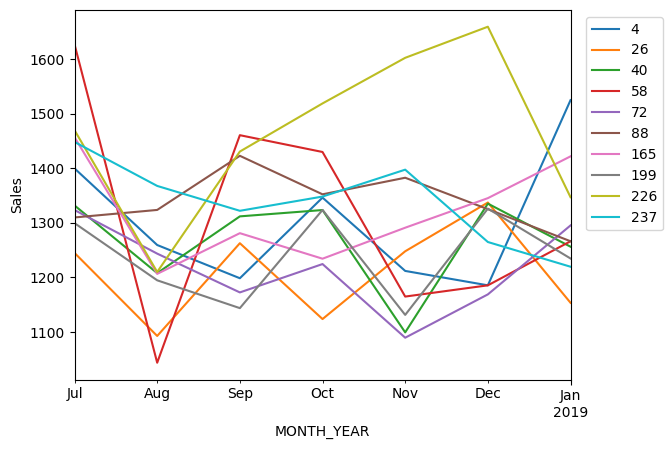

In [ ]:
chips_five=total_grp[[4,26,40,58,72,88,165,199,226,237]]
chips_five_df=pd.DataFrame(chips_five)
chips_five_pivot=chips_five_df.pivot_table(index='MONTH_YEAR',columns='STORE_NBR',values='TOT_SALES')
chips_five_pivot.plot()
plt.ylabel('Sales')
plt.legend(loc='upper right',bbox_to_anchor=(1.20,1))
plt.show()

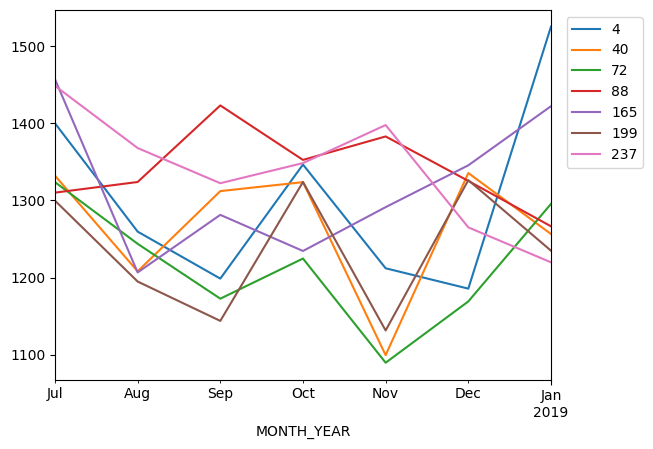

In [ ]:
#we remove 3 stores
chips_five=total_grp[[4,40,72,88,165,199,237]]
chips_five_df=pd.DataFrame(chips_five)
chips_five_pivot=chips_five_df.pivot_table(index='MONTH_YEAR',columns='STORE_NBR',values='TOT_SALES')
chips_five_pivot.plot()
plt.legend(loc='upper right',bbox_to_anchor=(1.20,1))
plt.show()

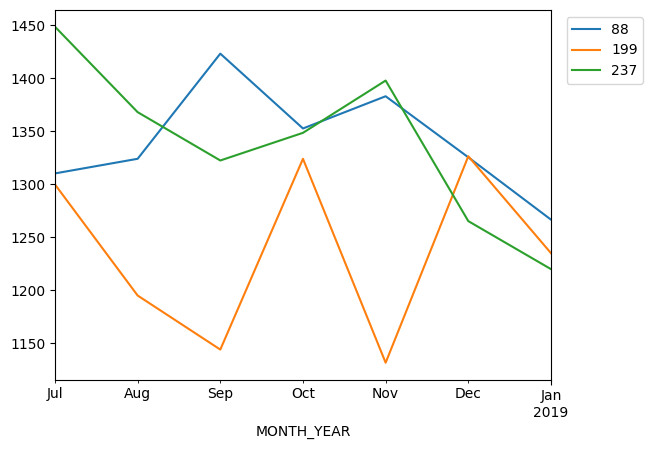

In [ ]:
#now by removing 2 stores
chips_five=total_grp[[88,199,237]]
chips_five_df=pd.DataFrame(chips_five)
chips_five_pivot=chips_five_df.pivot_table(index='MONTH_YEAR',columns='STORE_NBR',values='TOT_SALES')
chips_five_pivot.plot()
plt.legend(loc='upper right',bbox_to_anchor=(1.20,1))
plt.show()

In [ ]:
#since store 237 is close to the pattern of store 88
sorted_88=total_grp_pivot_table[88].sort_values(ascending=False)
sorted_88[237]

0.3084792217319044

Here the correlation is very low at .30, this store makes most by total sales.
* Store 77: Total sales=1699.00; Control Store: 233; Total sales(233)=1659.80
* Store 86: Total sales=6119.85; Control Store: 155; Total sales(155)=6308.70
* Store 88: Total sales=9383.60; Control Store: 237; Total sales(237)=9369.00

# Comparing trial stores and control stores.

In [ ]:
chips_trial=chips[(chips['MONTH_YEAR']>='02/2019')&(chips['MONTH_YEAR']<='04/2019')]
chips_trial['MONTH_YEAR'].value_counts()

2019-03-01    22592
2019-04-01    21766
2019-02-01    20405
Name: MONTH_YEAR, dtype: int64

In [ ]:
tstore_77=chips_trial[chips_trial['STORE_NBR']==77]
cstore_233=chips_trial[chips_trial['STORE_NBR']==233]
tstore_86=chips_trial[chips_trial['STORE_NBR']==86]
cstore_155=chips_trial[chips_trial['STORE_NBR']==155]
tstore_88=chips_trial[chips_trial['STORE_NBR']==88]
cstore_237=chips_trial[chips_trial['STORE_NBR']==237]

In [ ]:
tstore_77

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_YEAR
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,2019-03-01
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,2019-04-01
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,2019-02-01
73372,77003,2019-03-18,77,74917,80,Natural ChipCo Sea Salt & Vinegr 175g,1,3.0,175,NATURAL,OLDER FAMILIES,Mainstream,2019-03-01
73377,77007,2019-03-20,77,74923,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150,KETTLE,OLDER SINGLES/COUPLES,Premium,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73890,77482,2019-03-24,77,75445,102,Kettle Mozzarella Basil & Pesto 175g,1,5.4,175,KETTLE,RETIREES,Premium,2019-03-01
73894,77488,2019-02-17,77,75450,94,Burger Rings 220g,2,4.6,220,BURGER,OLDER SINGLES/COUPLES,Mainstream,2019-02-01
73902,77496,2019-03-06,77,75459,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,YOUNG SINGLES/COUPLES,Mainstream,2019-03-01
73904,77500,2019-03-12,77,75461,81,Pringles Original Crisps 134g,1,3.7,134,PRINGLES,RETIREES,Budget,2019-03-01


Store 77 and 233

In [ ]:
tstore_77[['TOT_SALES','PROD_QTY']].sum()

TOT_SALES    777.0
PROD_QTY     234.0
dtype: float64

In [ ]:
cstore_233[['TOT_SALES','PROD_QTY']].sum()

TOT_SALES    601.7
PROD_QTY     175.0
dtype: float64

In [ ]:
tstore_77['LYLTY_CARD_NBR'].value_counts()

77000    2
77338    2
77115    2
77207    2
77350    2
        ..
77151    1
77147    1
77144    1
77142    1
77502    1
Name: LYLTY_CARD_NBR, Length: 124, dtype: int64

In [ ]:
tstore_77[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    148
dtype: int64

In [ ]:
cstore_233[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    121
dtype: int64

In [ ]:
cstore_233['LYLTY_CARD_NBR'].value_counts()

233227    2
233449    2
233327    2
233111    2
233398    2
         ..
233139    1
233138    1
233136    1
233135    1
233491    1
Name: LYLTY_CARD_NBR, Length: 112, dtype: int64

In [ ]:
#repeated coustomers
repeat_customers=tstore_77['LYLTY_CARD_NBR'].value_counts()
print(repeat_customers.head(24))
repeats_total=24

77000    2
77338    2
77115    2
77207    2
77350    2
77123    2
77420    2
77424    2
77402    2
77450    2
77077    2
77341    2
77454    2
77069    2
77462    2
77466    2
77359    2
77045    2
77139    2
77482    2
77389    2
77009    2
77007    2
77206    2
Name: LYLTY_CARD_NBR, dtype: int64


In [ ]:
repeat_customers2=cstore_233['LYLTY_CARD_NBR'].value_counts()
print(repeat_customers2.head(9))
repeats_total2=0

233227    2
233449    2
233327    2
233111    2
233398    2
233071    2
233284    2
233341    2
233186    2
Name: LYLTY_CARD_NBR, dtype: int64


In [ ]:
#grouping
group77=tstore_77.groupby('MONTH_YEAR')
group233=cstore_233.groupby('MONTH_YEAR')

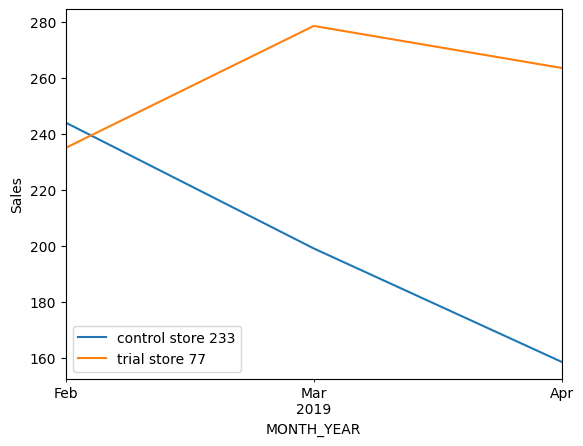

In [ ]:
group233=cstore_233.groupby('MONTH_YEAR')
group233['TOT_SALES'].sum().plot(label='control store 233')
group77['TOT_SALES'].sum().plot(label='trial store 77')
plt.ylabel('Sales')
plt.legend()
plt.show()

* Store 77:
   * TOT_SALES=777.0
   * PROD_QTY=234.0
   * REPEAT CST=24
   * TOTAL CST=145

* Store 233:
   * TOT_SALES=601.70
   * PROD_QTY=175.0
   * REPEAT CST=9
   * TOTAL CST=121

Store 86 and 155

In [ ]:
tstore_86[['TOT_SALES','PROD_QTY']].sum()

TOT_SALES    2788.2
PROD_QTY      815.0
dtype: float64

In [ ]:
cstore_155[['TOT_SALES','PROD_QTY']].sum()

TOT_SALES    2540.2
PROD_QTY      736.0
dtype: float64

In [ ]:
tstore_86['LYLTY_CARD_NBR'].value_counts()

86112     6
86230     5
86075     5
86116     5
86172     5
         ..
86120     1
86117     1
86110     1
86103     1
155311    1
Name: LYLTY_CARD_NBR, Length: 215, dtype: int64

In [ ]:
tstore_86[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    408
dtype: int64

In [ ]:
cstore_155[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    368
dtype: int64

In [ ]:
cstore_155['LYLTY_CARD_NBR'].value_counts()

155048    5
155010    5
155082    5
155153    5
155158    4
         ..
155188    1
155187    1
155152    1
155183    1
155140    1
Name: LYLTY_CARD_NBR, Length: 190, dtype: int64

In [ ]:
#repeated coustomers
repeat_customers_86=tstore_86['LYLTY_CARD_NBR'].value_counts()
print(repeat_customers.head(123))
repeats_total=123

77000    2
77338    2
77115    2
77207    2
77350    2
        ..
77155    1
77151    1
77147    1
77144    1
77142    1
Name: LYLTY_CARD_NBR, Length: 123, dtype: int64


In [ ]:
#repeated coustomers
repeat_customers_155=cstore_155['LYLTY_CARD_NBR'].value_counts()
repeat_customers_155.iloc[:155]

155048    5
155010    5
155082    5
155153    5
155158    4
         ..
155084    1
155107    1
155176    1
155174    1
155173    1
Name: LYLTY_CARD_NBR, Length: 155, dtype: int64

In [ ]:
#grouping
group86=tstore_86.groupby('MONTH_YEAR')
group155=cstore_155.groupby('MONTH_YEAR')

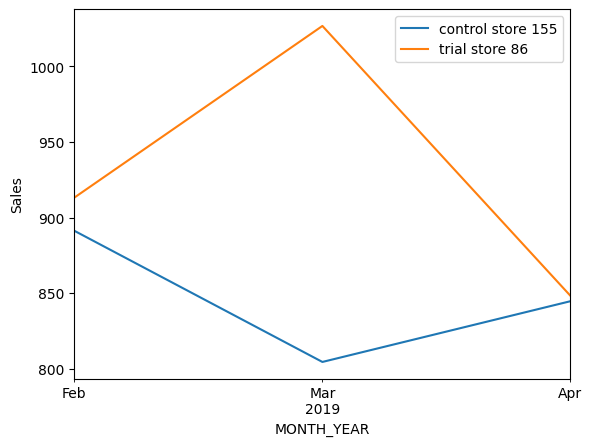

In [ ]:
group155['TOT_SALES'].sum().plot(label='control store 155')
group86['TOT_SALES'].sum().plot(label='trial store 86')
plt.ylabel('Sales')
plt.legend()
plt.show()

* Store 86:
   * TOT_SALES=2788.2
   * PROD_QTY=815.0
   * REPEAT CST=123
   * TOTAL CST=215

* Store 155:
   * TOT_SALES=2540.2
   * PROD_QTY=736.0
   * REPEAT CST=111
   * TOTAL CST=190

Store 88 and 237

In [ ]:
tstore_88[['TOT_SALES','PROD_QTY']].sum()

TOT_SALES    4286.8
PROD_QTY      972.0
dtype: float64

In [ ]:
cstore_237['LYLTY_CARD_NBR'].value_counts()

237366    6
237325    5
237182    5
237038    5
237217    4
         ..
237177    1
237178    1
237179    1
237180    1
237384    1
Name: LYLTY_CARD_NBR, Length: 262, dtype: int64

In [ ]:
tstore_88['LYLTY_CARD_NBR'].value_counts()

88313    6
88231    5
88257    4
88212    4
88358    4
        ..
88164    1
88170    1
88178    1
88186    1
88190    1
Name: LYLTY_CARD_NBR, Length: 261, dtype: int64

In [ ]:
cstore_237['LYLTY_CARD_NBR'].value_counts()

237366    6
237325    5
237182    5
237038    5
237217    4
         ..
237177    1
237178    1
237179    1
237180    1
237384    1
Name: LYLTY_CARD_NBR, Length: 262, dtype: int64

In [ ]:
tstore_88[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    486
dtype: int64

In [ ]:
cstore_237[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    430
dtype: int64

In [ ]:
#repeated coustomers
repeat_customers_88=tstore_88['LYLTY_CARD_NBR'].value_counts()
print(repeat_customers.head(145))
repeats_total=145

77000    2
77338    2
77115    2
77207    2
77350    2
        ..
77151    1
77147    1
77144    1
77142    1
77502    1
Name: LYLTY_CARD_NBR, Length: 124, dtype: int64


In [ ]:
#repeated coustomers
repeat_customers_237=cstore_237['LYLTY_CARD_NBR'].value_counts()
repeat_customers_237.iloc[:235]

237366    6
237325    5
237182    5
237038    5
237217    4
         ..
237222    1
237224    1
237225    1
237226    1
237229    1
Name: LYLTY_CARD_NBR, Length: 235, dtype: int64

In [ ]:
#grouping
group88=tstore_88.groupby('MONTH_YEAR')
group237=cstore_237.groupby('MONTH_YEAR')

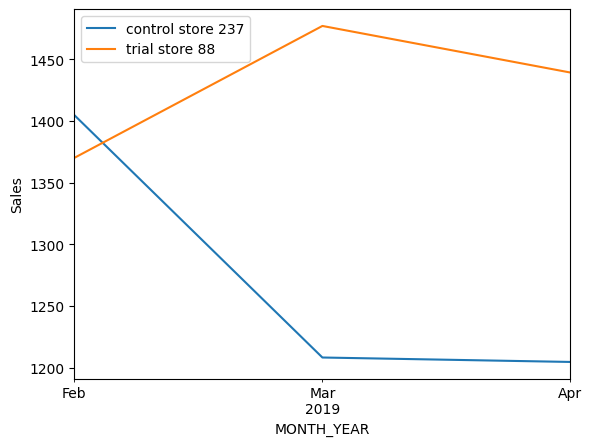

In [ ]:
group237['TOT_SALES'].sum().plot(label='control store 237')
group88['TOT_SALES'].sum().plot(label='trial store 88')
plt.ylabel('Sales')
plt.legend()
plt.show()


   * TOT_SALES=4286.8
   * PROD_QTY=972
   * REPEAT CST=145
   * TOTAL CST=261


Stores stack up with average transactions per customer

In [ ]:
group88['LYLTY_CARD_NBR'].value_counts().mean()

1.2590673575129534

In [ ]:
group237['LYLTY_CARD_NBR'].value_counts().mean()

1.178082191780822

In [ ]:
group86['LYLTY_CARD_NBR'].value_counts().mean()

1.2477064220183487

In [ ]:
group155['LYLTY_CARD_NBR'].value_counts().mean()

1.2777777777777777

In [ ]:
group77['LYLTY_CARD_NBR'].value_counts().mean()

1.0422535211267605

In [ ]:
group233['LYLTY_CARD_NBR'].value_counts().mean()

1.0521739130434782

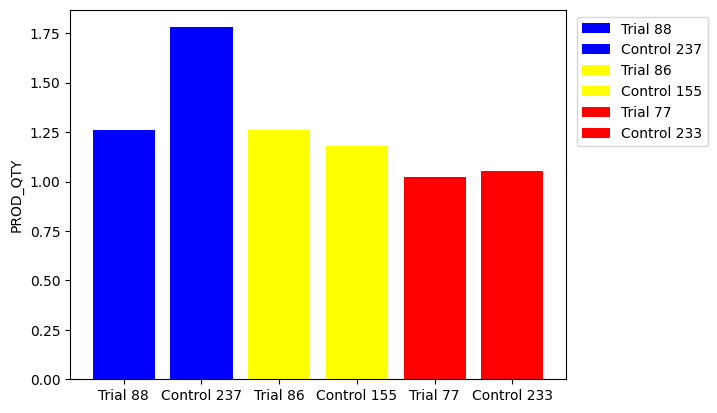

In [ ]:
group1=['Trial 88','Control 237']
group2=['Trial 86','Control 155']
group3=['Trial 77','Control 233']
values_grp1=[1.259,1.78]
values_grp2=[1.259,1.178]
values_grp3=[1.024,1.052]
plt.bar(group1,values_grp1,label=group1,color='blue')
plt.bar(group2,values_grp2,label=group2,color='yellow')
plt.bar(group3,values_grp3,label=group3,color='red')
plt.ylabel('PROD_QTY')
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1))
plt.show()

Here we can observe that average transactions are higher for 2 of the 3 trial stores

In [ ]:
# Total sales revenue
ts=sum(chips['TOT_SALES'])
#ts=total sum i.e., total sales revenue
print(ts)

1933114.9999996515


In [ ]:
#Since there is no coustomer column, I am using TX_ID, as it is unique for every individual
chips.describe()

In [ ]:
# Total number of customers
tc=241584
#tc= total number of customers
# Average number of transactions per customer
chips.shape

(264834, 13)

In [ ]:
avg_trans=tc/264834
print(avg_trans)

0.9122091574344684


# CONCLUSION:
Comparing to the trial stores and control stores; sales,products sold, amount of repeated customers and average transactions per customer all shows signs that the trial stores are performing the control stores during this period.
If we increase the amount of trial stores and run another analysis to see if the increased sales stay true and stablized at a higher point.